In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")


In [6]:
# Load the dataset
# Define the file path
file_path = r'C:\Users\Admin\Desktop\MoldX\MPC19_Job.csv'

# Try reading with a different encoding
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='utf-8-sig')

# Display the first few rows
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
# Summary statistics
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
# Check for missing values
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


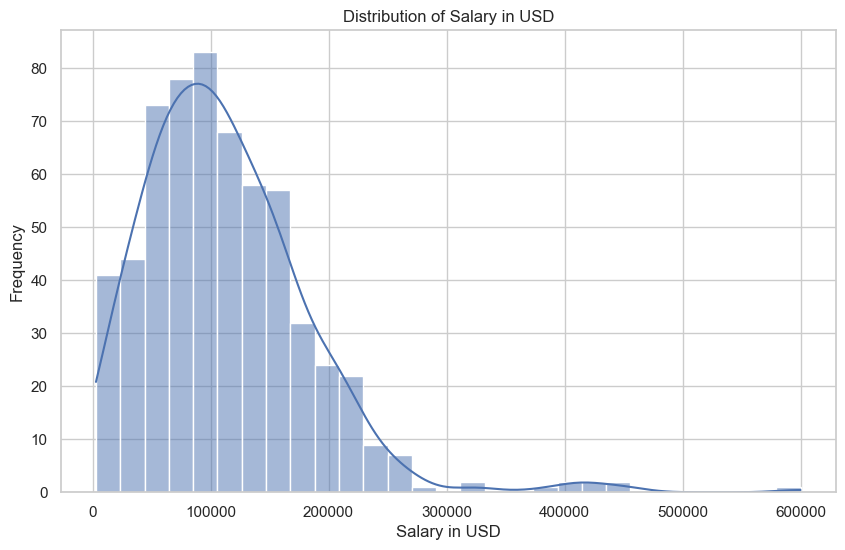

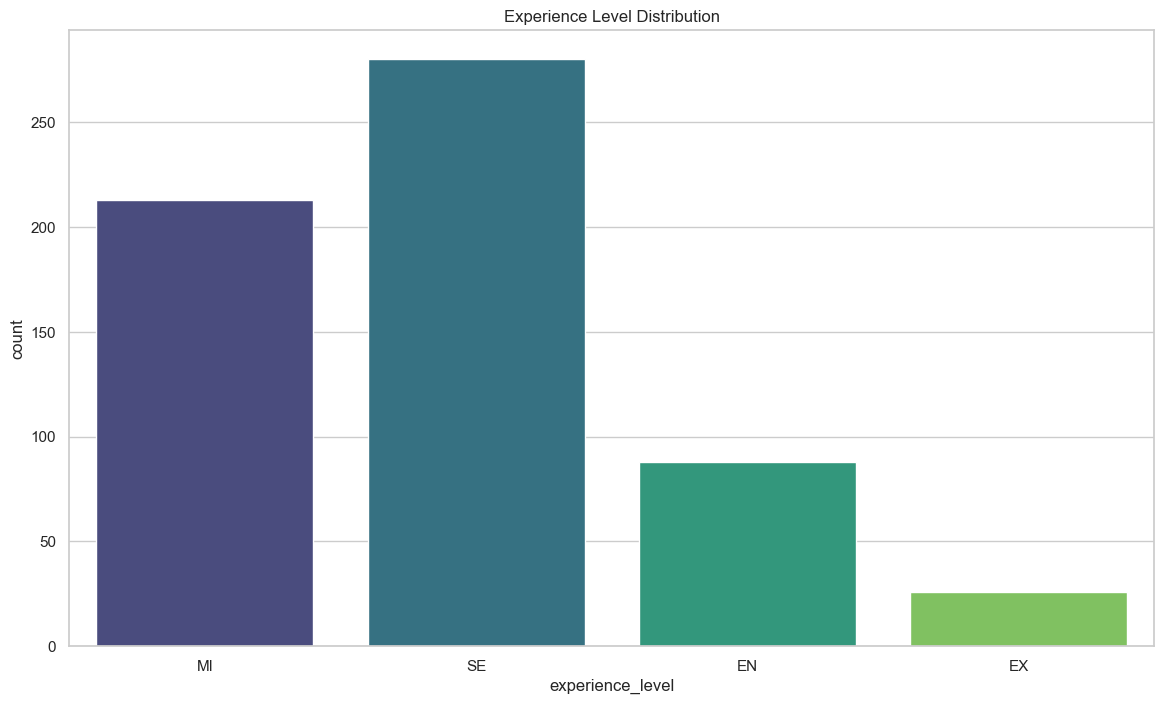

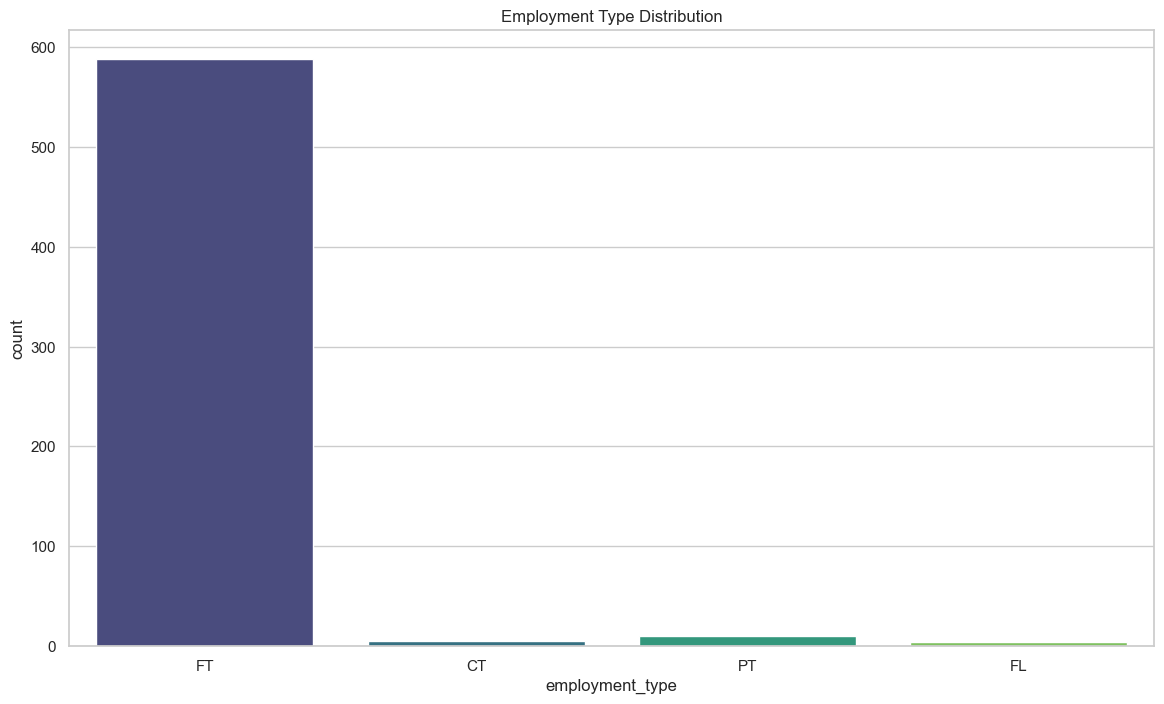

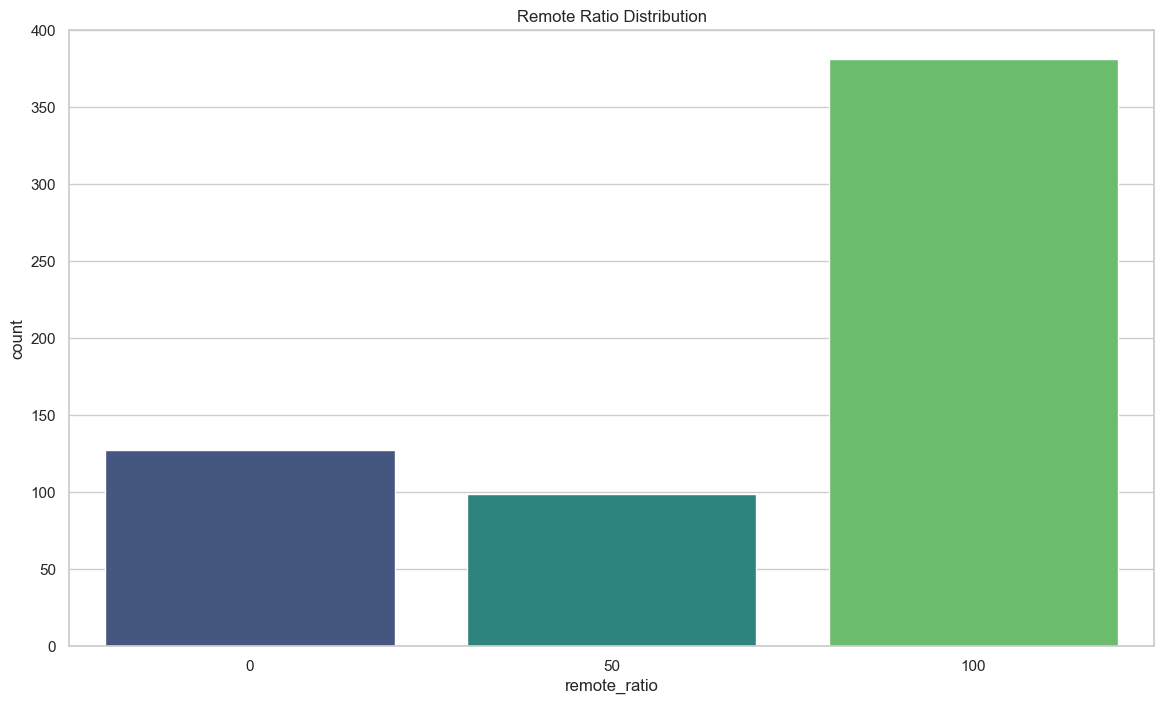

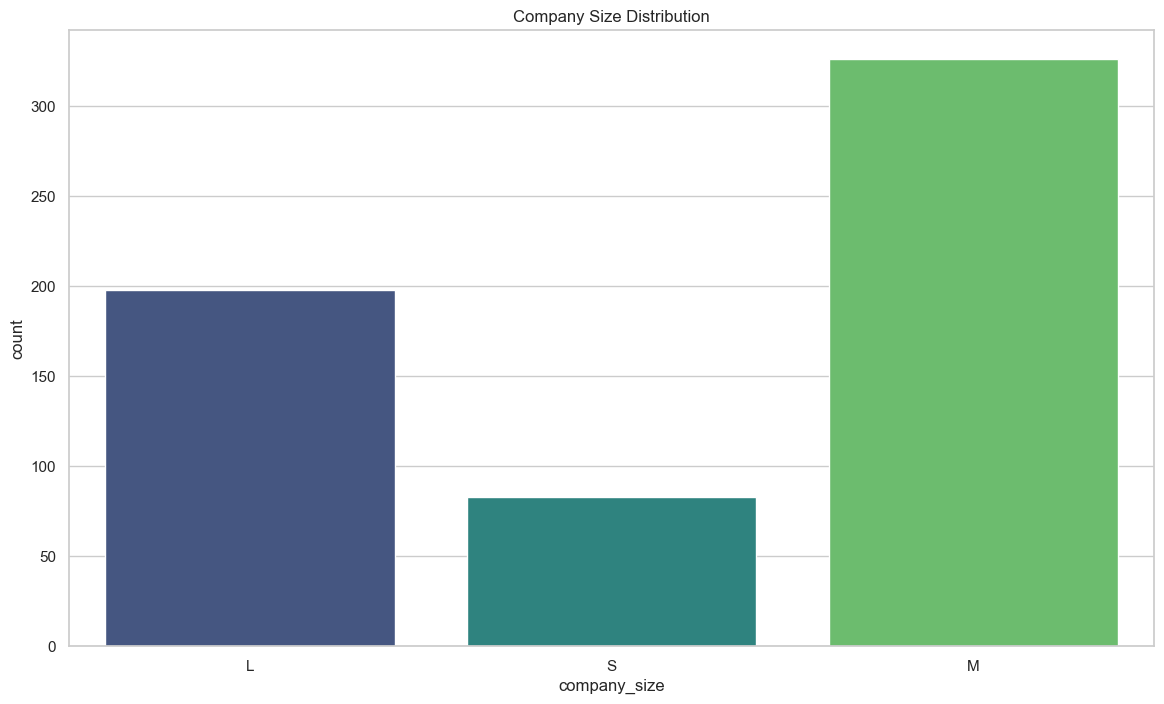

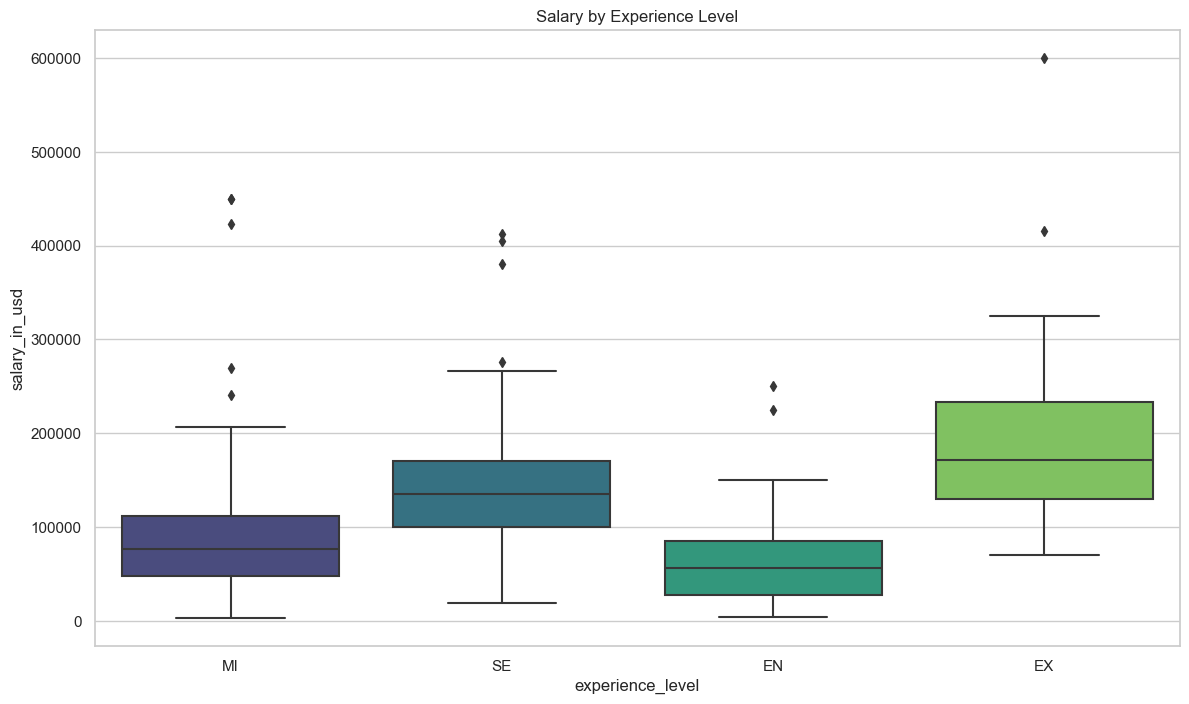

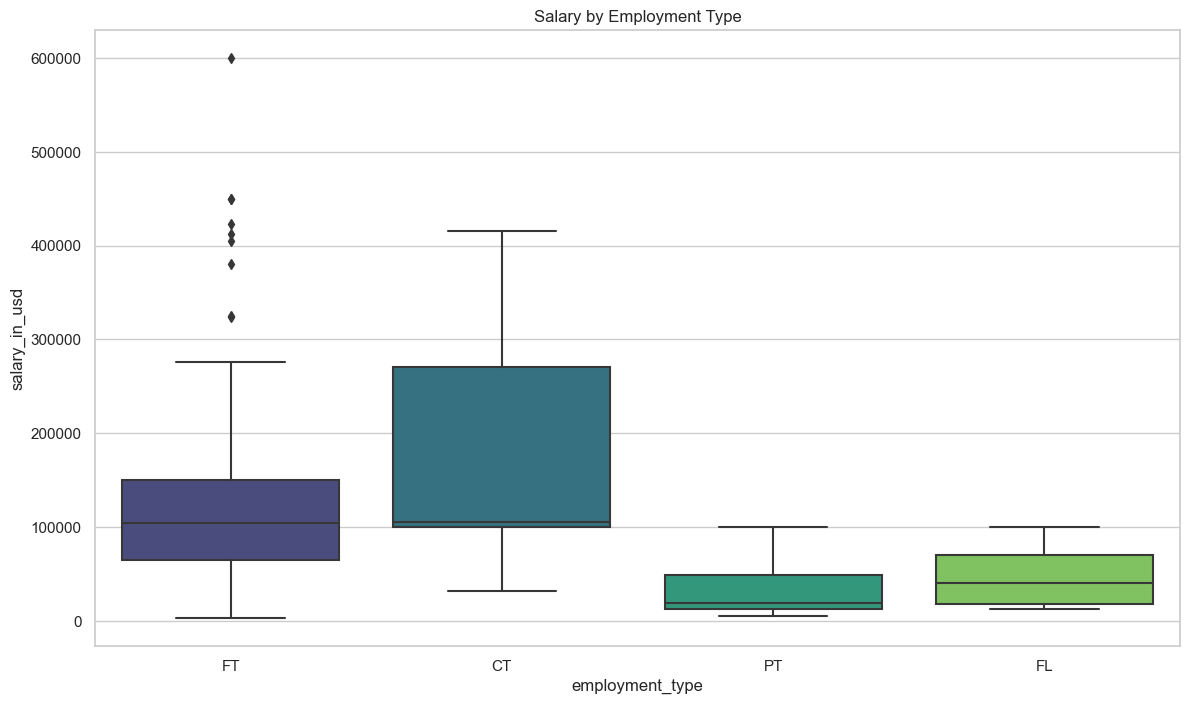

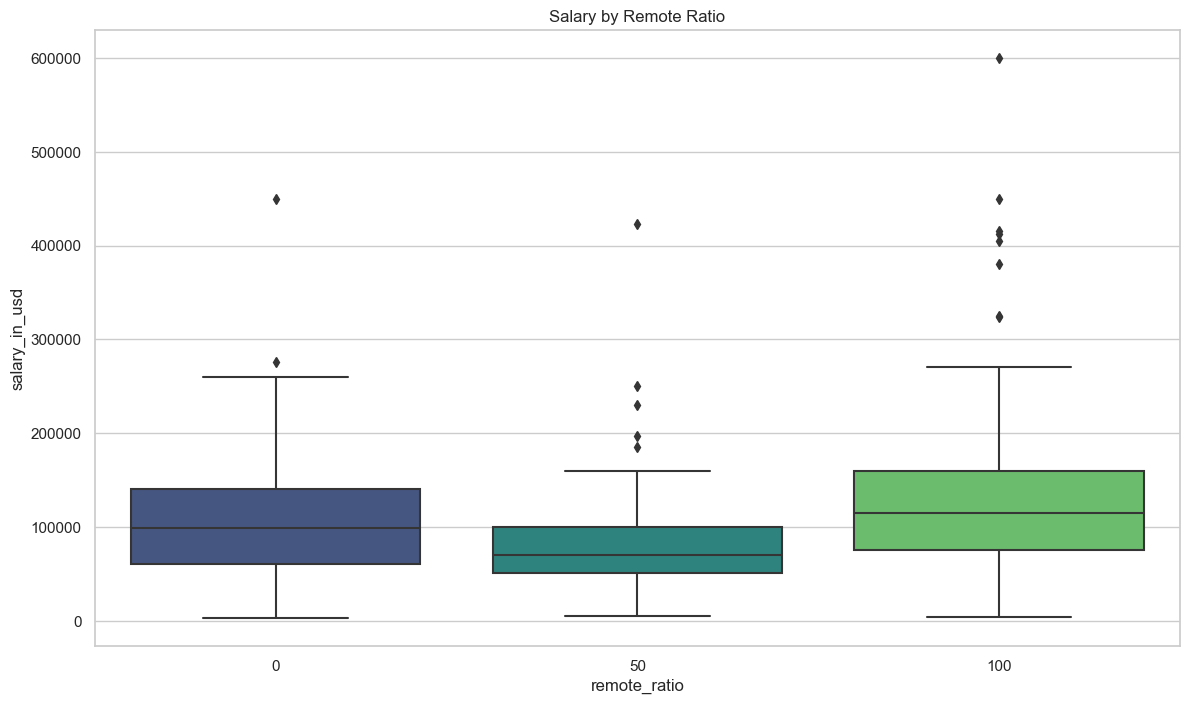

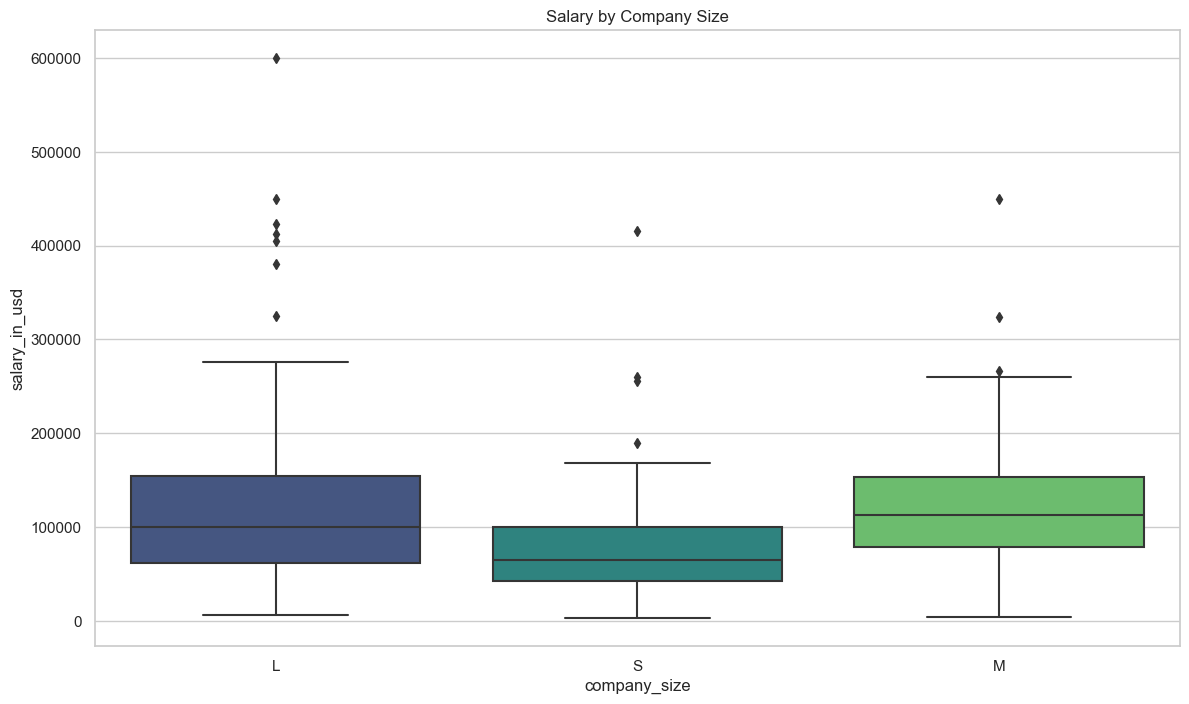

In [9]:
# Distribution of salary
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

# Count plots for categorical variables
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='experience_level', palette='viridis')
plt.title('Experience Level Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='employment_type', palette='viridis')
plt.title('Employment Type Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='remote_ratio', palette='viridis')
plt.title('Remote Ratio Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='company_size', palette='viridis')
plt.title('Company Size Distribution')
plt.show()

# Boxplots for salary across different categories
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='viridis')
plt.title('Salary by Experience Level')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', palette='viridis')
plt.title('Salary by Employment Type')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', palette='viridis')
plt.title('Salary by Remote Ratio')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette='viridis')
plt.title('Salary by Company Size')
plt.show()


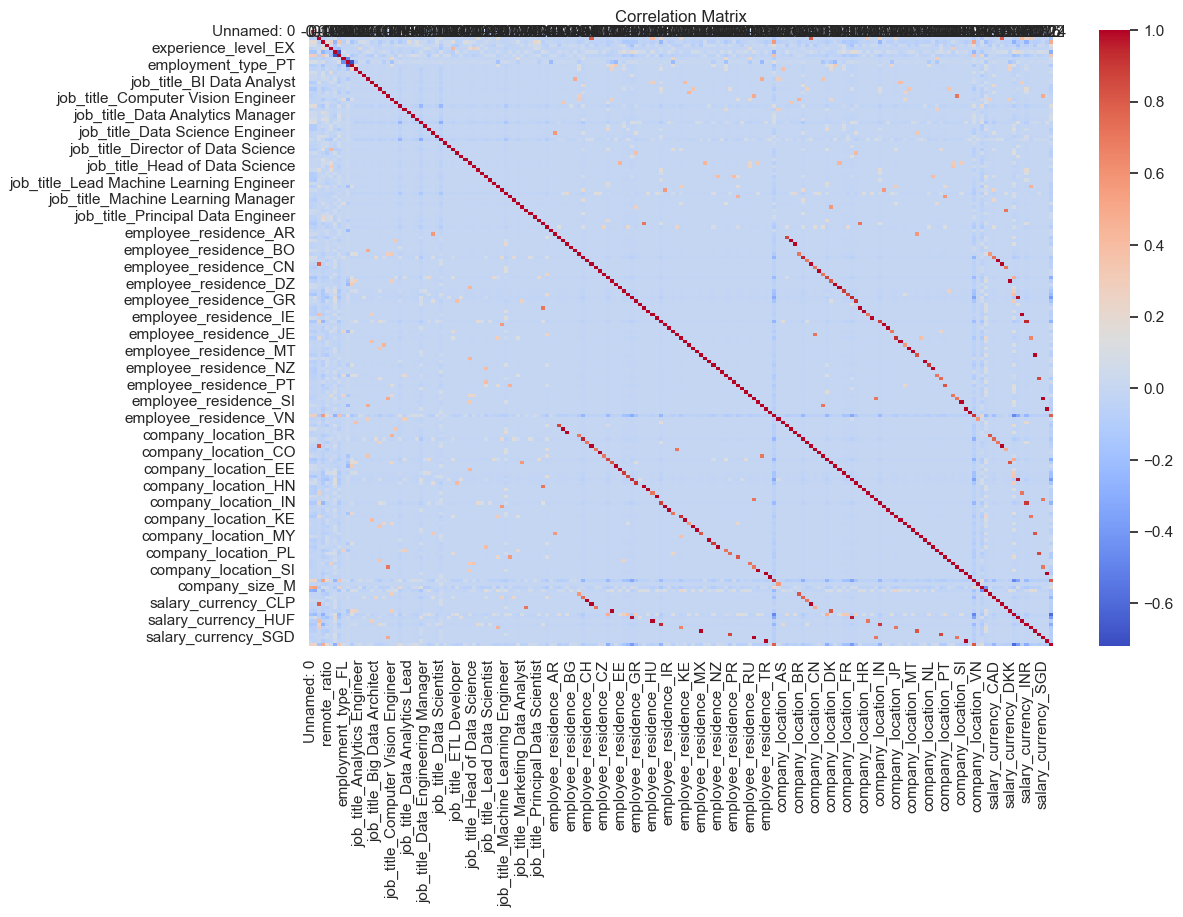

In [13]:
# Encode categorical variables
categorical_features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size', 'salary_currency']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Correlation matrix with encoded categorical variables
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Feature scaling
scaler = StandardScaler()
numeric_features = ['work_year', 'salary', 'remote_ratio']

df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Display the first few rows of the scaled dataset
df_encoded.head()


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,...,salary_currency_EUR,salary_currency_GBP,salary_currency_HUF,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_TRY,salary_currency_USD
0,0,-2.032024,-0.164605,79833,-1.743615,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
1,1,-2.032024,-0.041475,260000,-1.743615,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
2,2,-2.032024,-0.154885,109024,-0.514377,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
3,3,-2.032024,-0.197008,20000,-1.743615,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,4,-2.032024,-0.112761,150000,-0.514377,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [15]:
# Define the features and target variable
X = df_encoded.drop(columns=['salary_in_usd'])
y = df_encoded['salary_in_usd']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R^2': r2}

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df


,MAE,MSE,RMSE,R^2
Linear Regression,38651.323024,4.455123e+09,66746.704750,-0.162438
Decision Tree,4460.819672,1.931365e+08,13897.354663,0.949607
Random Forest,4020.224672,1.427600e+08,11948.223466,0.962751
Gradient Boosting,4461.394929,7.484776e+07,8651.460133,0.980471
Support Vector Regressor,46347.936645,3.849304e+09,62042.757036,-0.004366


In [17]:
# Display the results
results_df.sort_values(by='RMSE', ascending=True)

,MAE,MSE,RMSE,R^2
Gradient Boosting,4461.394929,7.484776e+07,8651.460133,0.980471
Random Forest,4020.224672,1.427600e+08,11948.223466,0.962751
Decision Tree,4460.819672,1.931365e+08,13897.354663,0.949607
Support Vector Regressor,46347.936645,3.849304e+09,62042.757036,-0.004366
Linear Regression,38651.323024,4.455123e+09,66746.704750,-0.162438


In [18]:
# Print the final recommendation
best_model = results_df.sort_values(by='RMSE').iloc[0]
print(f"The best model for salary prediction is: {best_model.name}")
print(f"Performance Metrics:\n{best_model}")


The best model for salary prediction is: Gradient Boosting
Performance Metrics:
MAE     4.461395e+03
MSE     7.484776e+07
RMSE    8.651460e+03
R^2     9.804706e-01
Name: Gradient Boosting, dtype: float64
